
# tinyurl.com/ANLPColab4Part1

It is easier to download all files for today's session from Canvas

## Word Embeddings (Word2Vec)

Word embeddings are dense vector representations of words in a mathematical space, typically in high-dimensional space, where each dimension captures a different aspect of the word's meaning. These representations are learned from large amounts of text data using techniques like neural networks, specifically models like Word2Vec, GloVe, and fastText. Here, we'll take a look at **Word2Vec**.

The first step is importing required packages. We'll import word2vec from a package called **Gensim**

In [1]:
import gensim
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
import numpy as np
import nltk
nltk.download('punkt')

import warnings

warnings.filterwarnings(action='ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
#function to process the text input and create a list of tokenized sentences
def createDataArray(text):
  # replaces newline with space to ensure the text is treated as a continuous string
  continuousText = text.replace("\n", " ")
  data = [] #initializes an empty list to store the tokenized sentences.
  # iterate through each sentence in the file
  for i in sent_tokenize(continuousText):
    temp = []

    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)
  return data

# Create a CBOW model
def createCBOWModel(data):
  cbow_model = gensim.models.Word2Vec(data, min_count=1,
                                vector_size=100, window=5, sg=0)
  return cbow_model

# Create a Skip Gram model
def createSkipGramModel(data):
  skipgram_model = gensim.models.Word2Vec(data, min_count=1, vector_size=100,
                                window=5, sg=1)
  return skipgram_model

#Parameters explained:
#min_count=1: Ignores all words with a total frequency lower than this
#vector_size=100: The dimensionality of the word vectors
#window=5: The maximum distance between the current and predicted word within a sentence
#sg=0: Specifies the training algorithm. 0 means CBOW, 1 means Skip-gram

### Let's use a toy example to create a small word vector embedding

In [3]:
sample_text = """
Once upon a time in a land far, far away, there lived a little rabbit.
This rabbit was very curious and loved to explore the woods around his home.
One day, he found a hidden path that led to a magical garden full of wonderful flowers.
The rabbit was so amazed by the beauty of the garden that he decided to visit it every day.
In the garden, he met many new friends, including a wise old owl and a playful squirrel.
"""

And test the model

In [4]:
data = createDataArray(sample_text)
cbow_model = createCBOWModel(data)
skipgram_model = createSkipGramModel(data)

# Test the CBOW model
print("CBOW Model - Words similar to 'rabbit':")
similar_words_cbow = cbow_model.wv.most_similar("rabbit", topn=5)
for word, similarity in similar_words_cbow:
    print(f"{word}: {similarity:.4f}")

# Test the Skip-gram model
print("\nSkip-gram Model - Words similar to 'rabbit':")
similar_words_skipgram = skipgram_model.wv.most_similar("rabbit", topn=5)
for word, similarity in similar_words_skipgram:
    print(f"{word}: {similarity:.4f}")

CBOW Model - Words similar to 'rabbit':
was: 0.1666
this: 0.1624
he: 0.1389
.: 0.1313
once: 0.1283

Skip-gram Model - Words similar to 'rabbit':
was: 0.1659
this: 0.1624
he: 0.1388
.: 0.1321
once: 0.1276


In [5]:
#Get the vector for the word 'garden' from both models
garden_vector_cbow = cbow_model.wv['garden']
garden_vector_skipgram = skipgram_model.wv['garden']

print(f"\nCBOW Vector for 'garden': {garden_vector_cbow[:10]}...")  # Display the first 10 dimensions for brevity
print(f"Skip-gram Vector for 'garden': {garden_vector_skipgram[:10]}...")


CBOW Vector for 'garden': [ 0.00814698 -0.00442942  0.00898294  0.00828784 -0.00437581  0.00023826
  0.00431408 -0.00384858 -0.00560351 -0.00656039]...
Skip-gram Vector for 'garden': [ 8.0698775e-03 -4.3716696e-03  8.9669591e-03  8.3990060e-03
 -4.2797145e-03  6.6322013e-05  4.5168474e-03 -3.6192976e-03
 -5.7294723e-03 -6.6772620e-03]...


Let's try to visualise the embedding (Remember this might not be possible for large embeddings)

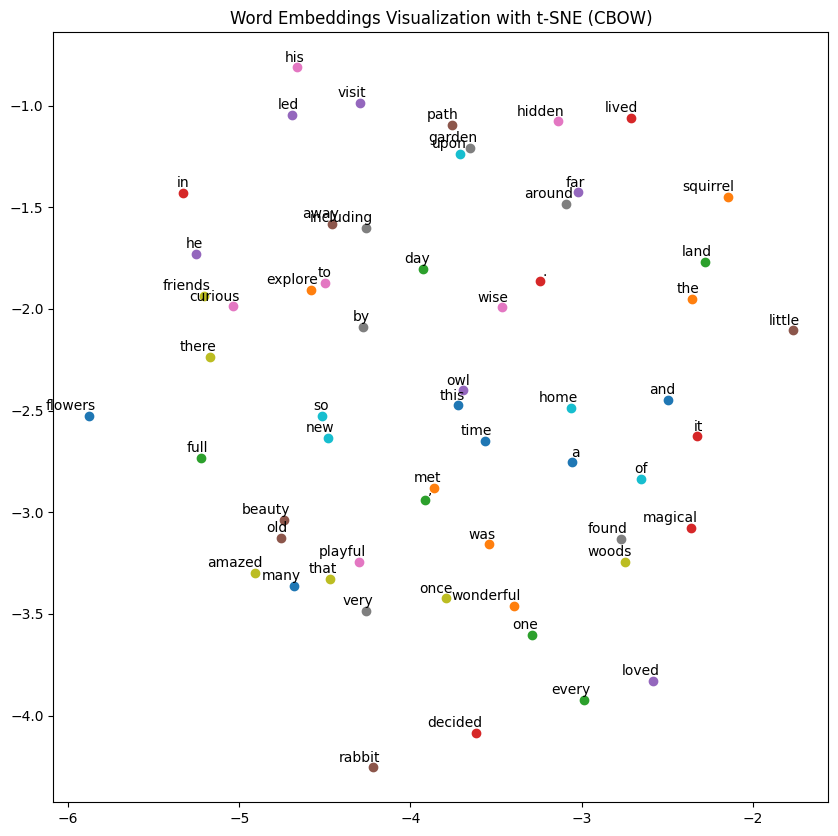

In [6]:
# Get the word vectors and corresponding words
word_vectors = cbow_model.wv
words = list(word_vectors.index_to_key)
# Convert list of word vectors to a NumPy array
vectors = np.array([word_vectors[word] for word in words])

# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, random_state=0)
vectors_2d = tsne.fit_transform(vectors)

# Plot the embeddings
plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1])
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.title('Word Embeddings Visualization with t-SNE (CBOW)')
plt.show()

### Let's create our embeddings with a book text

In [7]:
# read a file directly from a URL
from urllib.request import urlopen

def read_url(url):
    return urlopen(url).read().decode()

In [8]:
# Read the text of GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND
book_url = 'https://www.gutenberg.org/files/11/11-0.txt'
book_text = read_url(book_url)

In [9]:
# Check what type of object book_text is
print(f"Type of book_text: {type(book_text)}")
print(book_text[:500]) #print first 500 characters of the string

Type of book_text: <class 'str'>
*** START OF THE PROJECT GUTENBERG EBOOK 11 ***
[Illustration]




Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-Hole
 CHAPTER II.    The Pool of Tears
 CHAPTER III.   A Caucus-Race and a Long Tale
 CHAPTER IV.    The Rabbit Sends in a Little Bill
 CHAPTER V.     Advice from a Caterpillar
 CHAPTER VI.    Pig and Pepper
 CHAPTER VII.   A Mad Tea-Party
 CHAPTER VIII.  The Queen’s Croquet-Ground


In [10]:
data = createDataArray(book_text)
cbow_model = createCBOWModel(data)
skipgram_model = createSkipGramModel(data)

# Test CBOW model
print("CBOW Model - Words similar to 'alice':")
similar_words_cbow = cbow_model.wv.most_similar("alice", topn=5)
for word, similarity in similar_words_cbow:
    print(f"{word}: {similarity:.4f}")

# Test Skip-gram model
print("\nSkip-gram Model - Words similar to 'alice':")
similar_words_skipgram = skipgram_model.wv.most_similar("alice", topn=5)
for word, similarity in similar_words_skipgram:
    print(f"{word}: {similarity:.4f}")

CBOW Model - Words similar to 'alice':
,: 0.9997
that: 0.9997
the: 0.9997
it: 0.9997
:: 0.9997

Skip-gram Model - Words similar to 'alice':
thought: 0.9906
,: 0.9856
king: 0.9814
herself: 0.9794
hatter: 0.9775


In [11]:
#get the vector for the word 'alice' from both models
alice_vector_cbow = cbow_model.wv['alice']
alice_vector_skipgram = skipgram_model.wv['alice']

print(f"\nCBOW Vector for 'alice': {alice_vector_cbow[:10]}...")  # Display the first 10 dimensions for brevity
print(f"Skip-gram Vector for 'alice': {alice_vector_skipgram[:10]}...")


CBOW Vector for 'alice': [-0.33094233  0.2593928   0.3013454   0.00381495  0.12227945 -0.8793078
  0.38004795  0.99399054 -0.41057023 -0.5222848 ]...
Skip-gram Vector for 'alice': [-0.07663699  0.05307622 -0.05708698  0.1342889   0.0301059  -0.43585327
  0.28253612  0.5058101  -0.14397047 -0.33142477]...


### We may also use a pre-trained model that is readily available

In [12]:
# First, let's import the necessary libraries
import gensim.downloader as api
from gensim.models import KeyedVectors
import numpy as np

# Download a pre-trained word2vec model
# This might take a few minutes depending on your internet connection
model = api.load('word2vec-google-news-300')

print("Model loaded successfully!")




[==================================================] 100.0% 1662.8/1662.8MB downloaded
Model loaded successfully!


Perform some similarity and analogy tasks using the model

In [13]:
# Find similar words
similar_words = model.most_similar('computer', topn=5)
print("Words most similar to 'computer':")
for word, score in similar_words:
    print(f"{word}: {score:.4f}")

# Find the odd word out
odd_word = model.doesnt_match(['breakfast', 'cereal', 'dinner', 'lunch'])
print(f"\nOdd word out: {odd_word}")

# Solve analogies
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print("\nSolving the analogy: man is to king as woman is to...")

# Accessing the first (and only) result
first_result = result[0]

# Accessing the word (first element of the tuple)
result_word = first_result[0]

# Accessing the score (second element of the tuple)
result_score = first_result[1]

# Printing the results
print("Word:", result_word)
print("Score: {:.4f}".format(result_score))

Words most similar to 'computer':
computers: 0.7979
laptop: 0.6640
laptop_computer: 0.6549
Computer: 0.6473
com_puter: 0.6082

Odd word out: cereal

Solving the analogy: man is to king as woman is to...
Word: queen
Score: 0.7118


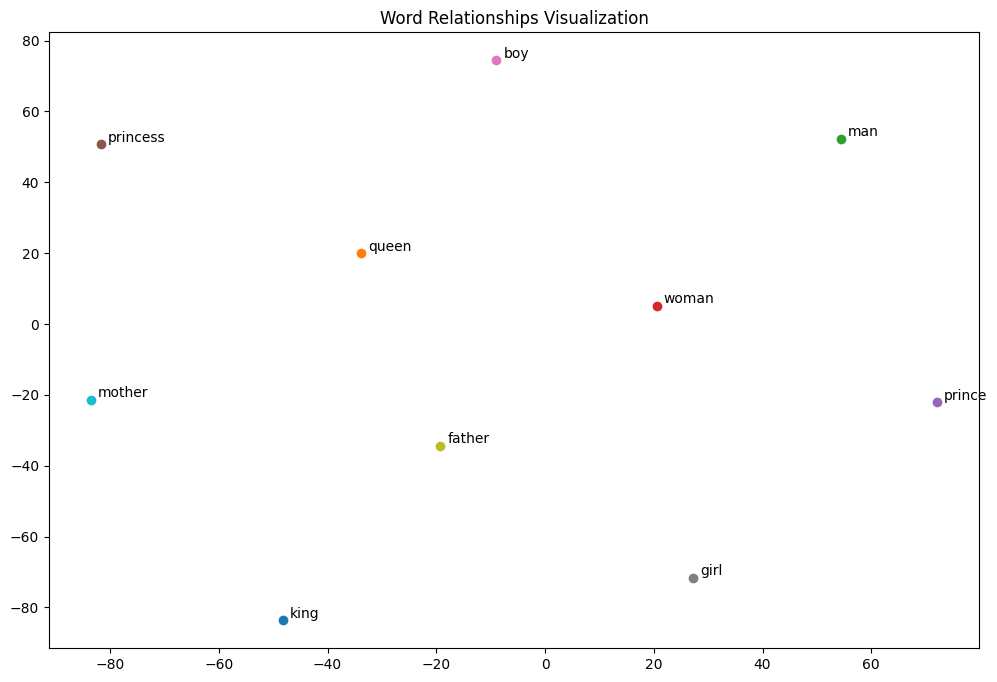

In [14]:
# Visualise word relationships

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

def plot_words(model, words):
    # Get word vectors
    word_vectors = []
    valid_words = []
    for word in words:
        if word in model.key_to_index:
            word_vectors.append(model[word])
            valid_words.append(word)
        else:
            print(f"Warning: '{word}' not in vocabulary, skipping.")

    if len(word_vectors) < 2:
        print("Error: Not enough valid words to plot.")
        return

    # Convert list of word vectors to numpy array
    word_vectors = np.array(word_vectors)

    # Perform t-SNE dimensionality reduction
    tsne = TSNE(n_components=2, random_state=0, perplexity=min(30, len(word_vectors) - 1))
    words_tsne = tsne.fit_transform(word_vectors)

    # Plot the words
    plt.figure(figsize=(12, 8))
    for i, word in enumerate(valid_words):
        x, y = words_tsne[i, :]
        plt.scatter(x, y)
        plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
    plt.title("Word Relationships Visualization")
    plt.show()

# Let's visualize some related words
words_to_plot = ['king', 'queen', 'man', 'woman', 'prince', 'princess',
                 'boy', 'girl', 'father', 'mother']
plot_words(model, words_to_plot)

## Let's view the list of all available word embeddings we can use
These are pre-trained and can be applied directly (which one we use depends on the task at hand)

In [15]:
import gensim.downloader as api

# List all available pre-trained word embeddings
available_embeddings = api.info()['models'].keys()

# Print the available embeddings
for embedding in available_embeddings:
    print(embedding)

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


## You can also use embeddings from Hugging Face if you are interested in transformer-based models

In [16]:
#!pip install transformers
#from transformers import AutoModel, AutoTokenizer
!pip install huggingface_hub

# You can use the HfApi class from the transformers library to list available models
from huggingface_hub import HfApi

# Initialize the API
api = HfApi()

# List all available models
models = list(api.list_models())

# Print the first 10 models as an example
for model in models[:10]:
  print(model.modelId)

microsoft/OmniParser
Etched/oasis-500m
HuggingFaceTB/SmolLM2-1.7B-Instruct
stabilityai/stable-diffusion-3.5-large
genmo/mochi-1-preview
black-forest-labs/FLUX.1-dev
tencent/Tencent-Hunyuan-Large
stabilityai/stable-diffusion-3.5-medium
nvidia/Llama-3.1-Nemotron-70B-Instruct-HF
amphion/MaskGCT
